In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

In [2]:
cancer = load_breast_cancer()

In [7]:
df_cancer = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df_cancer['target'] = cancer['target']
df_cancer['target_label'] = df_cancer['target'].apply(lambda x: 'malignant' if x == 0 else 'benign')
df_cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,target_label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0,malignant


In [8]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
df_cancer['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [38]:
from sklearn.metrics import auc, roc_auc_score, roc_curve, precision_recall_curve, f1_score, average_precision_score, classification_report

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_cancer.iloc[:,:-2], df_cancer['target'], stratify=df_cancer['target'], random_state=41)

# DecisionTree

In [46]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

Train Classification Report:
              precision    recall  f1-score   support

   malignant       1.00      1.00      1.00       159
      benign       1.00      1.00      1.00       267

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426

Test Classification Report:
              precision    recall  f1-score   support

   malignant       0.89      0.91      0.90        53
      benign       0.94      0.93      0.94        90

    accuracy                           0.92       143
   macro avg       0.92      0.92      0.92       143
weighted avg       0.92      0.92      0.92       143



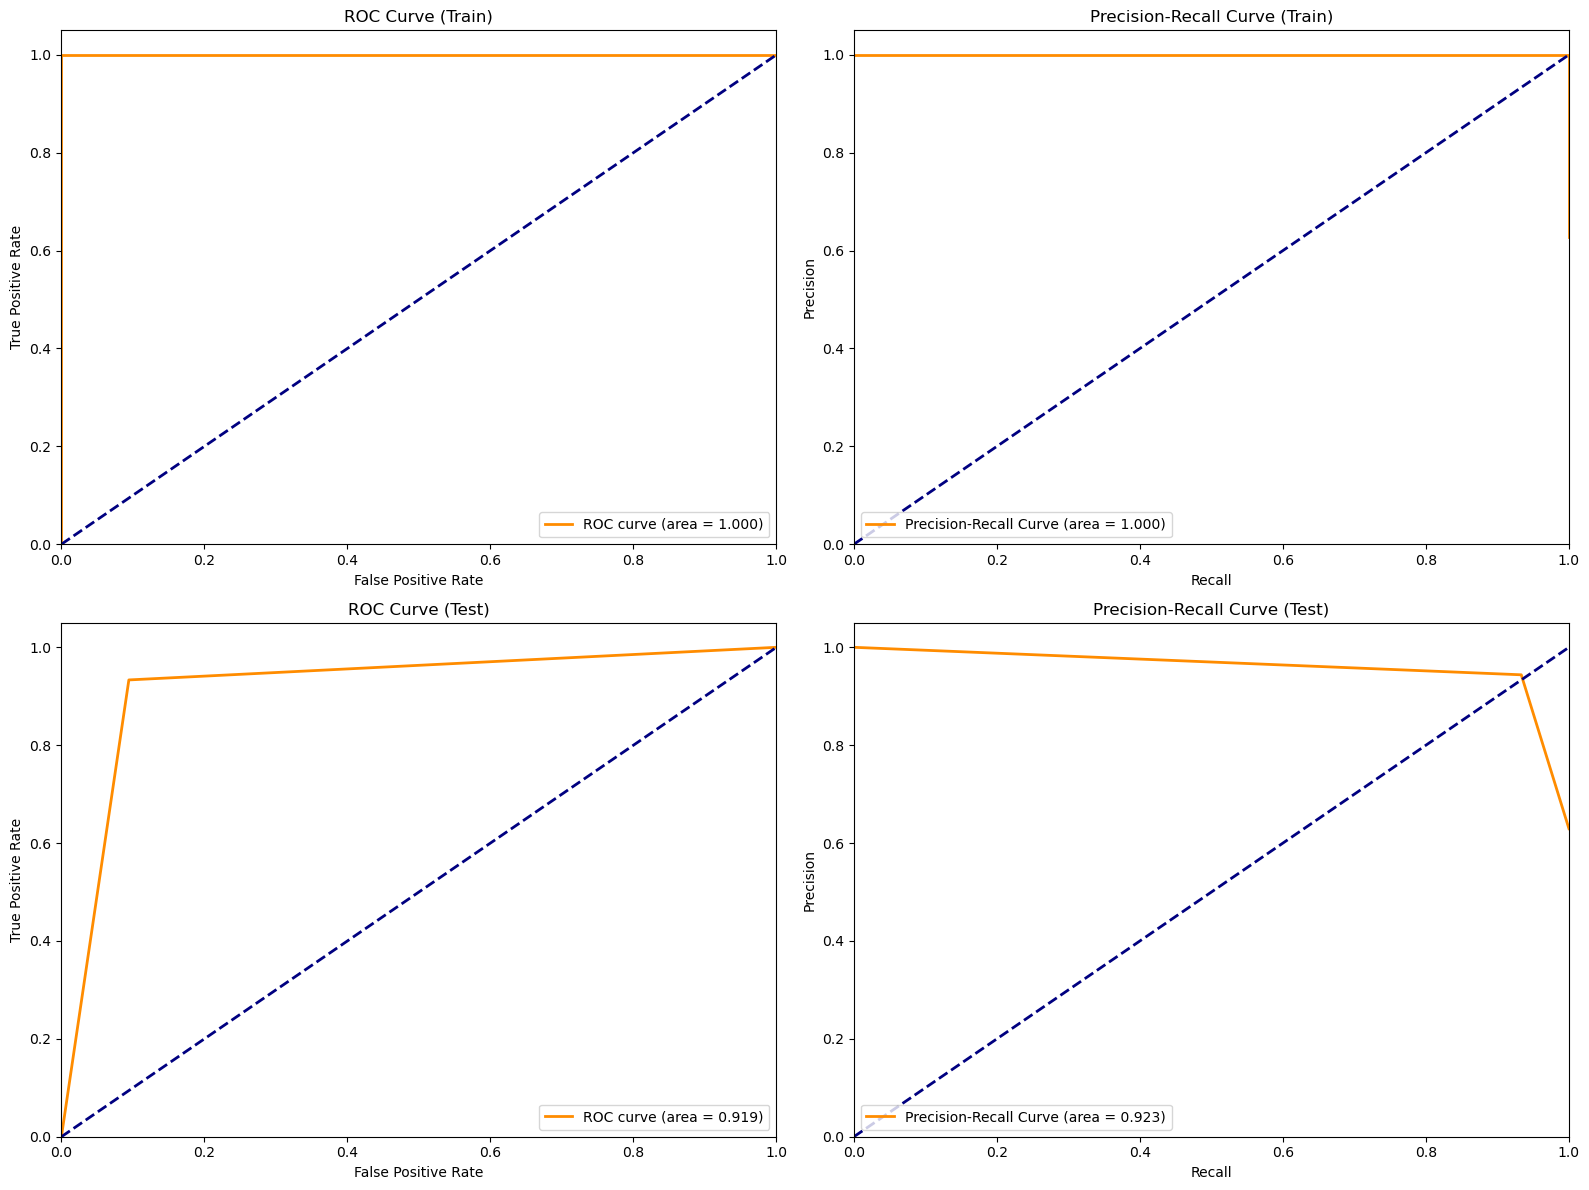

In [53]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
print('Train Classification Report:')
print(classification_report(y_train, y_train_pred, target_names=cancer.target_names))
print('Test Classification Report:')
print(classification_report(y_test, y_test_pred, target_names=cancer.target_names))

plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 1)
fpr, tpr, _ = roc_curve(y_train, y_train_pred)
roc_auc = roc_auc_score(y_train, y_train_pred)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Train)')
plt.legend(loc='lower right')
plt.subplot(2, 2, 2)
precision, recall, _ = precision_recall_curve(y_train, y_train_pred)
pr_roc_auc = average_precision_score(y_train, y_train_pred)
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall Curve (area = {:.3f})'.format(pr_roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Train)')
plt.legend(loc='lower left')

plt.subplot(2, 2, 3)
fpr, tpr, _ = roc_curve(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test)')
plt.legend(loc='lower right')

plt.subplot(2, 2, 4)
precision, recall, _ = precision_recall_curve(y_test, y_test_pred)
pr_roc_auc = average_precision_score(y_test, y_test_pred)
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall Curve (area = {:.3f})'.format(pr_roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Test)')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()